In [66]:
import json
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from utils.constant import ATTRIBUTES
import pandas as pd

In [112]:
font_size = 26
sns.set_style("white")
plt.rcParams['xtick.labelsize'] = font_size
plt.rcParams['ytick.labelsize'] = font_size
plt.rcParams['axes.spines.left'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams["legend.loc"] = 'best'
plt.rcParams["figure.figsize"] = (30, 15)
plt.rcParams.update({'font.size': font_size})

In [142]:
def plot_score_per_attr(scores_file, model_name):
    with open(scores_file) as json_data:
        attributes_dict = json.load(json_data)
    array_preds = np.array([np.round(np.array(l)) for l in attributes_dict['logits']])
    total_preds = np.sum(array_preds, axis=0)
    df = pd.DataFrame(columns=['count','attributes'])
    df['count'] = total_preds.astype(int)
    df['attributes'] = ATTRIBUTES.values()
    df['attributes_id'] = [i for i in range(40)]
    print(df)
    ax = plt.axes()
    sns.barplot(data=df, x='attributes_id', y='count', orient='v', ax=ax, palette='colorblind')

    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.title.set_text(f"Number of prediction per classes for {model_name}")

    count           attributes  attributes_id
0    2280     5_o_Clock_Shadow              0
1    4857      Arched_Eyebrows              1
2    4222           Attractive              2
3   17844      Bags_Under_Eyes              3
4     316                 Bald              4
5    2030                Bangs              5
6    2745             Big_Lips              6
7   16507             Big_Nose              7
8    2733           Black_Hair              8
9    1584           Blond_Hair              9
10      0               Blurry             10
11   1621           Brown_Hair             11
12   5464       Bushy_Eyebrows             12
13   4802               Chubby             13
14   6892          Double_Chin             14
15   3441           Eyeglasses             15
16    851               Goatee             16
17   1322            Gray_Hair             17
18   2878         Heavy_Makeup             18
19  14379      High_Cheekbones             19
20   9203                 Male    

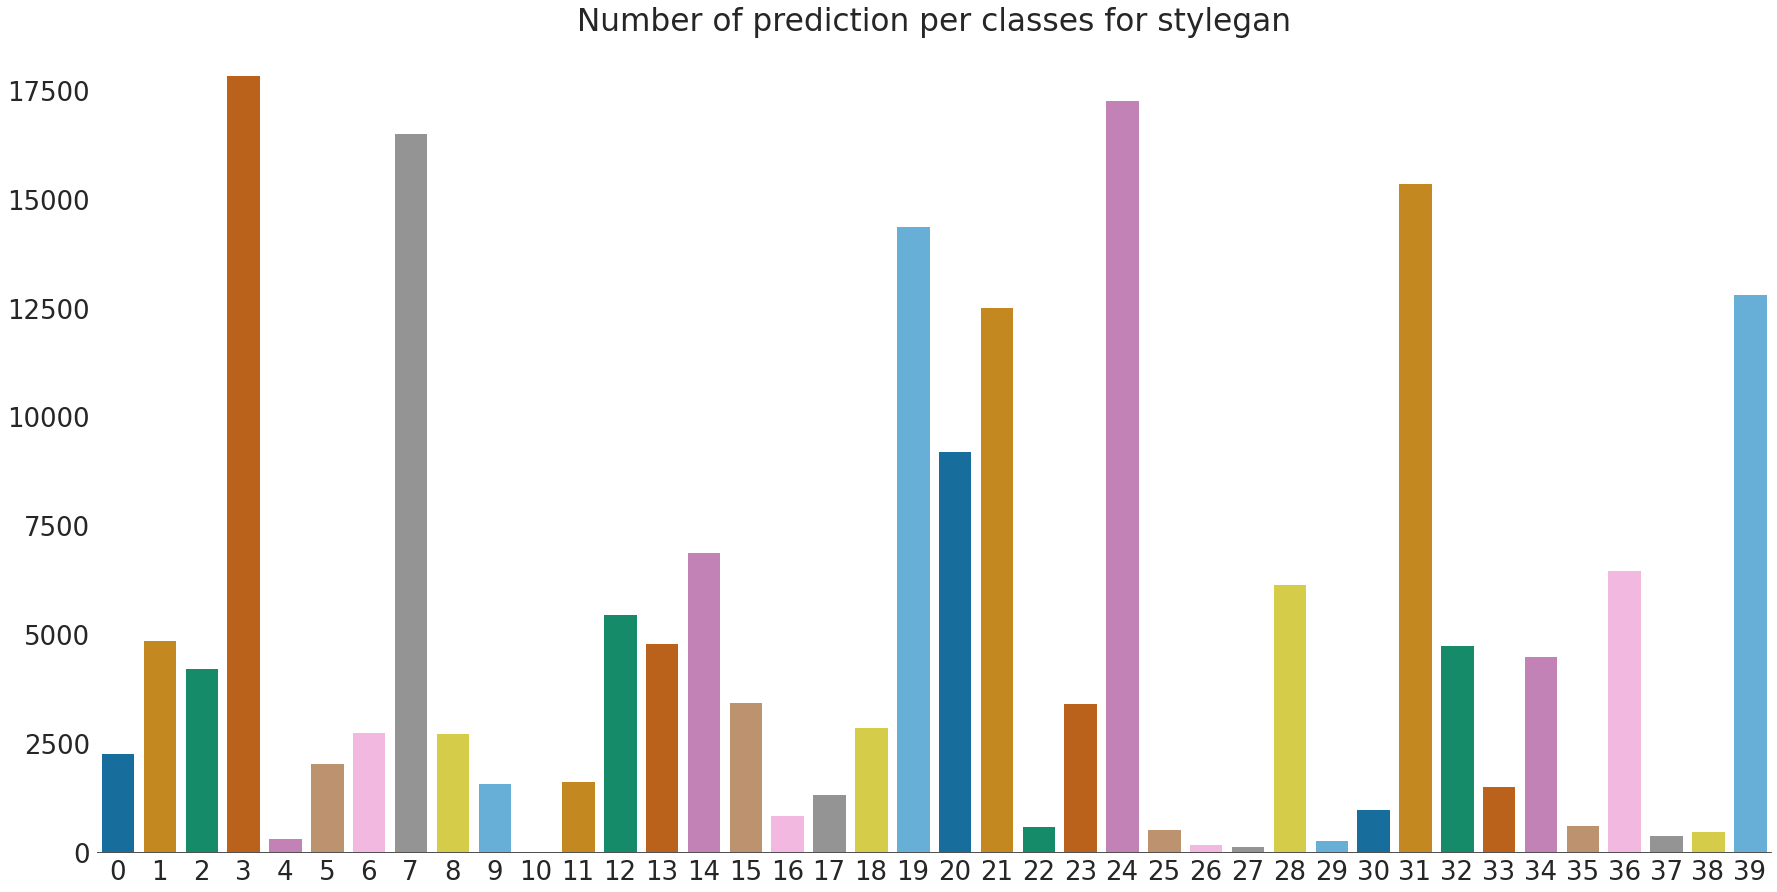

In [143]:
scores_file = 'outputs_stylegan/stylegan/scores_stylegan.json'
plot_score_per_attr(scores_file, 'stylegan')

    count           attributes  attributes_id
0    1992     5_o_Clock_Shadow              0
1    3481      Arched_Eyebrows              1
2    3555           Attractive              2
3   14650      Bags_Under_Eyes              3
4     924                 Bald              4
5    2257                Bangs              5
6    3401             Big_Lips              6
7   14345             Big_Nose              7
8    1942           Black_Hair              8
9    1697           Blond_Hair              9
10      0               Blurry             10
11   1398           Brown_Hair             11
12   3392       Bushy_Eyebrows             12
13   4480               Chubby             13
14   5093          Double_Chin             14
15   4071           Eyeglasses             15
16   1779               Goatee             16
17   1340            Gray_Hair             17
18   2440         Heavy_Makeup             18
19  11031      High_Cheekbones             19
20   9425                 Male    

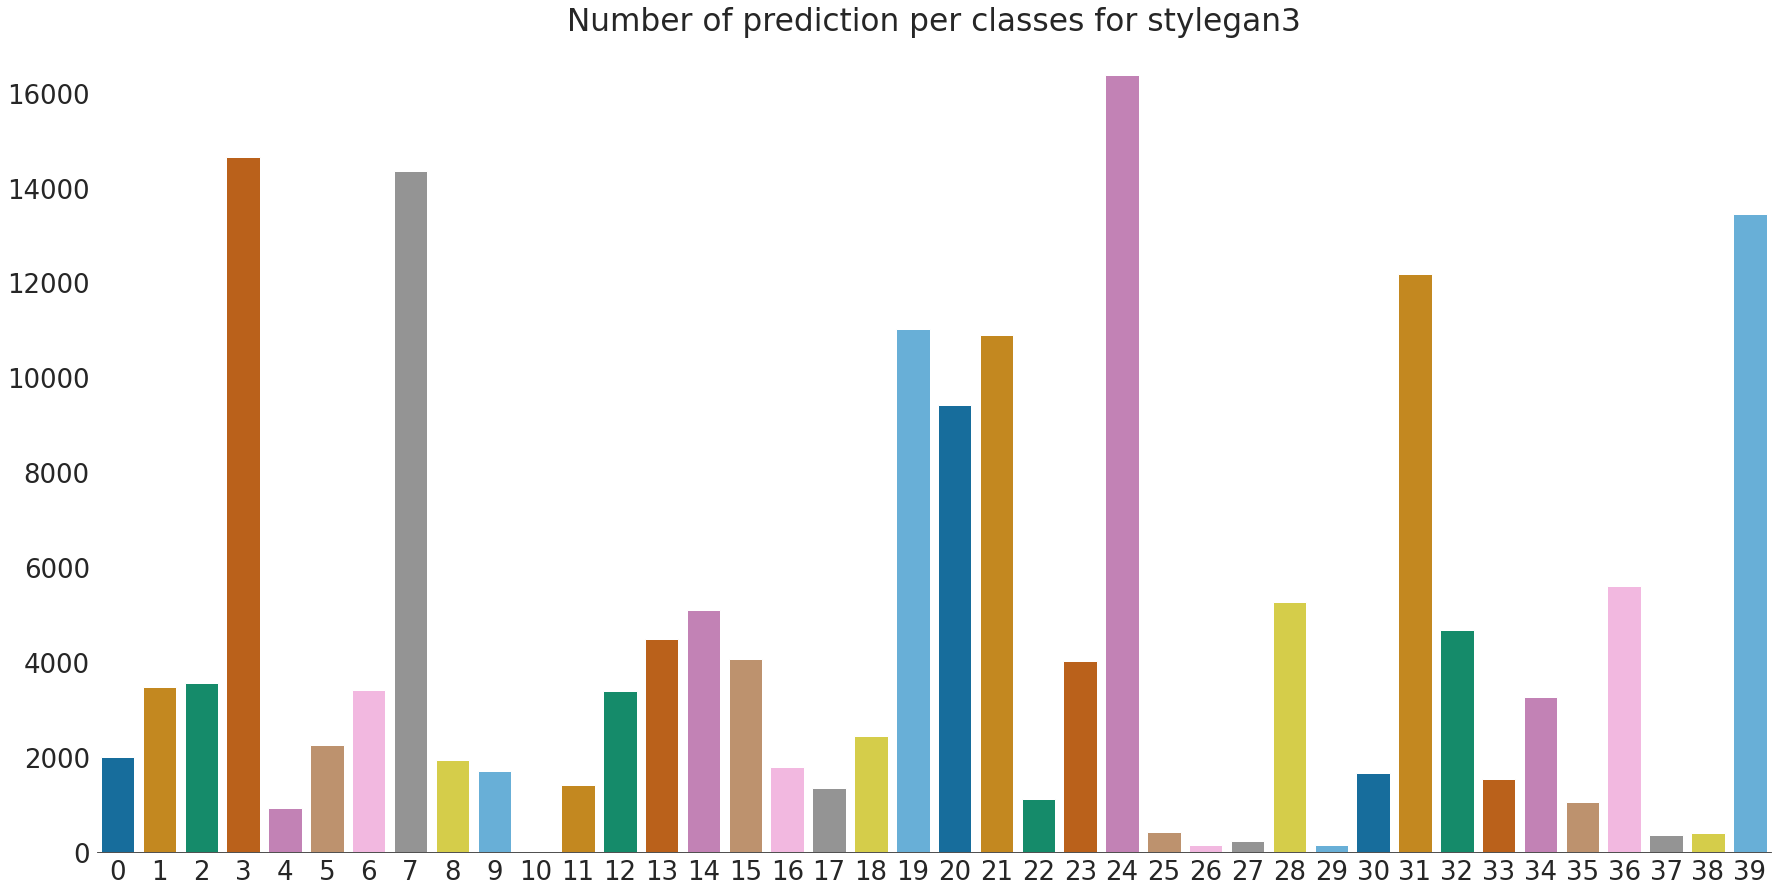

In [144]:
scores_file = 'outputs_stylegan/stylegan3/scores_stylegan3.json'
plot_score_per_attr(scores_file, 'stylegan3')